In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from data_preparation import *

In [4]:
class IteratorImages:
    def __init__(
            self,
            name_dataset: str = 'imagewang',
            drop_size: int = 1,
            split: str = "train",
            return_name: str = "image",
            size_image: tuple = (224, 224),
            load: bool = False
    ):
        builder = tfds.builder(name_dataset)
        ds = builder.as_dataset(split=split, shuffle_files=True)
        self.ds = ds.take(drop_size)
        self.name = return_name
        self.size_image = size_image
        self.load = load
        self.size_drop = drop_size

    def __next__(self):
        for ex in self.ds:
            res = ex[self.name]
            x, y = self.processed_image(res, self.size_image)
            if self.load is False:
                return x, y
            else:
                return x, y, ex["label"]

    def __iter__(self):
        return self

    def processed_image(self, img, size):
        image = conver_good_size(img, size)
        lab = rgb2lab(1.0 / 255 * image)
        print(image.shape)
        X, ab = lab[:, :, 0], lab[:, :, 1:]

        ab /= 128
        temp_x = X.reshape(size[0], size[1], 1)
        temp_y = ab.reshape(size[0], size[1], 2)
        return temp_x, temp_y


def conver_good_size(img, size_image=(224, 224)):
    if type(img) != Image:
        img = Image.fromarray(np.squeeze(img))

    img = img.resize(size_image)
    image = np.array(img, dtype=float)
    return image


ds = IteratorImages("imagewang", 1, "train", "image", (256, 256), True)

x, y, res = next(ds)

(256, 256, 3)


2023-04-23 17:17:52.457951: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(256, 256, 3)
tf.Tensor(16, shape=(), dtype=int64)


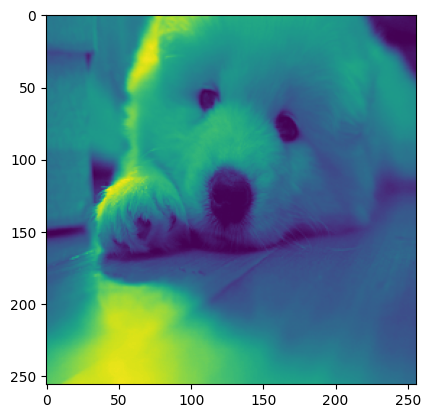

In [26]:
x, y, res = next(ds)
print(res)
plt.imshow(x)


In [1]:
from tensorflow.keras.datasets import caltech101

(x_train, y_train), (x_test, y_test) = caltech101.load_data()

ImportError: cannot import name 'caltech101' from 'tensorflow.keras.datasets' (/Users/semensestakov/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/__init__.py)